In [ ]:
pip install easyocr

In [4]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np

In [5]:
image_path="C2.tif"

In [47]:
#Detection using easyocr

In [6]:
reader=easyocr.Reader(['en'],gpu='False')
result=reader.readtext(image_path)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[162, 72], [238, 72], [238, 139], [162, 139]], '15', 0.9999125042636563),
 ([[1170, 72], [1249, 72], [1249, 133], [1170, 133]],
  '1/6',
  0.544105554641504),
 ([[2176, 76], [2252, 76], [2252, 132], [2176, 132]],
  '1/7',
  0.7385189944793243),
 ([[3177, 72], [3267, 72], [3267, 136], [3177, 136]],
  "1/8'",
  0.8976197242736816),
 ([[111, 114], [193, 114], [193, 178], [111, 178]], '26', 0.9999997471189183),
 ([[233, 167], [302, 167], [302, 206], [233, 206]], '289', 0.9445442449447107),
 ([[334, 179], [397, 179], [397, 218], [334, 218]], '287', 0.9771917462348938),
 ([[419, 166], [486, 166], [486, 207], [419, 207]], '285', 0.9989877829796605),
 ([[514, 170], [574, 170], [574, 209], [514, 209]], '28,', 0.8740718578429093),
 ([[622, 170], [678, 170], [678, 206], [622, 206]], '27', 0.999993087923841),
 ([[711, 176], [765, 176], [765, 215], [711, 215]], '278', 0.9117797017097473),
 ([[807, 173], [861, 173], [861, 212], [807, 212]], '275', 0.9949192404747009),
 ([[900, 170], [948, 170], [

In [48]:
#check a single output

In [14]:
result[6]

([[334, 179], [397, 179], [397, 218], [334, 218]], '287', 0.9771917462348938)

In [49]:
#visualize bounding boxes

In [15]:
top_left=tuple(result[0][0][0])
bottom_right=tuple(result[0][0][2])
text=result[0][1]
font=cv2.FONT_HERSHEY_COMPLEX


In [57]:
#separate results into 3 lists

In [68]:
prob=[]
value=[]
coords=[]
for i in range(len(result)):
    prob.append(result[i][2])
    value.append(result[i][1])
    coords.append(result[i][0])

In [69]:
#merge 3 lists into a single file

In [70]:
import pandas as pd

In [71]:
data=pd.DataFrame(list(zip(value,prob,coords)),columns=["Number detected","accuracy","bounding box coords"])

In [72]:
data.head()

,Number detected,accuracy,bounding box coords
0,15,0.999913,"[[162, 72], [238, 72], [238, 139], [162, 139]]"
1,1/6,0.544106,"[[1170, 72], [1249, 72], [1249, 133], [1170, 1..."
2,1/7,0.738519,"[[2176, 76], [2252, 76], [2252, 132], [2176, 1..."
3,1/8',0.897620,"[[3177, 72], [3267, 72], [3267, 136], [3177, 1..."
4,26,1.000000,"[[111, 114], [193, 114], [193, 178], [111, 178]]"


In [73]:
data.to_csv("archive.csv")

In [74]:
data["bounding box coords"][1]

[[1170, 72], [1249, 72], [1249, 133], [1170, 133]]

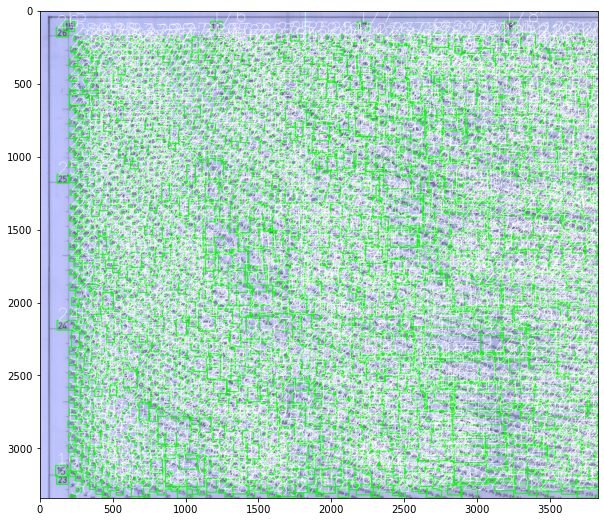

In [75]:
img=cv2.imread(image_path)
for detection in result:
    top_left=tuple([int(val) for val in detection[0][0]])
    bottom_right=tuple([int(val) for val in detection[0][2]])
    text=detection[1]
    font=cv2.FONT_HERSHEY_SIMPLEX
    img=cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
    img=cv2.putText(img,text,top_left,font,4,(255,255,255),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [77]:
data=pd.read_csv("archive.csv")
data.head(100)

,Unnamed: 0,Number detected,accuracy,bounding box coords
0,0,15,0.999913,"[[162, 72], [238, 72], [238, 139], [162, 139]]"
1,1,1/6,0.544106,"[[1170, 72], [1249, 72], [1249, 133], [1170, 1..."
2,2,1/7,0.738519,"[[2176, 76], [2252, 76], [2252, 132], [2176, 1..."
3,3,1/8',0.897620,"[[3177, 72], [3267, 72], [3267, 136], [3177, 1..."
4,4,26,1.000000,"[[111, 114], [193, 114], [193, 178], [111, 178]]"
...,...,...,...,...
95,95,20,0.998589,"[[3736, 267], [3776, 267], [3776, 295], [3736,..."
96,96,282,0.173275,"[[451, 308], [505, 308], [505, 349], [451, 349]]"
97,97,282,0.997399,"[[539, 303], [600, 303], [600, 336], [539, 336]]"
98,98,284,0.997379,"[[639, 305], [699, 305], [699, 343], [639, 343]]"
